이전 자료:https://github.com/leejin-kyu/DGU-MLDL2023

# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset

**사용된 Task:**


선형 회귀 분석(Linear Regression)
데이터의 상관 관계를 분석하여 종속 변수(y)와 독립 변수(x) 간의 선형 관계를 모델링하는 통계적인 방법입

서포트벡터 머신(SVM)
주어진 데이터를 고차원 공간으로 매핑한 후, 경계로 분류하는 결정 경계를 찾는 방식으로 작동합니다. 이를 통해 데이터를 잘 분류하거나 예측


의사결정트리(DecisionTreeRegressor)
 주어진 데이터를 분할하여 트리 형태로 구성하며, 각 노드에서는 분할 기준을 설정하여 데이터를 왼쪽 또는 오른쪽 자식 노드로 분할할함.. 이 과정을 반복하여 트리를 구성하고, 예측할 때는 해당 데이터가 속한 분할 영역의 평균값을 예측

**Datasets**

Context
The reason behind providing the data-set is that currently I'm doing my Master's in Computer Science, in my second semester I have chosen Data Science class, so in this class they are teaching me Linear Regression, so I decided to provide a set of x and y values, which not only helps me and also helps others.

Content
The dataset contains x and y values:
x values are just iterating values.
x values: Iterating Values Starting from 1 and ending at 300

y values depend on the equation y = mx+c.
데이터셋은 x와 y 값 칼럼으로 구성되어 있습니다. x 값은 반복되는 값들이며, 1부터 300까지 순차적으로 증가함.

y 값은 식 y = mx + c에 따라 결정됨. 여기서 m은 기울기(coefficients), c는 y 절편(intercept)을 나타냄.

Inspiration
Everyone on this planet should be familiar (at least Computer Science students, etc.) about Linear Regression, so calculate the trend line, R^2, coefficient and intercept values.



**Features(x):**

x values are just iterating values.


**Target(y):**

y values depend on the equation y = mx+c.

---

## Build Your Model

### Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 데이터 불러오기
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# 데이터 프레임 확인
print("Training data head:")
print(train_data.head())
print("\nTraining data info:")
print(train_data.info())
print("\nTraining data description:")
print(train_data.describe())

print("\nTesting data head:")
print(test_data.head())
print("\nTesting data info:")
print(test_data.info())
print("\nTesting data description:")
print(test_data.describe())

Training data head:
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None

Training data description:
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

Testing data head:
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

Testing data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 colu

In [2]:
train_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [3]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [4]:

# 결측치 확인
print("Before preprocessing:")
print("Training data with null values:")
print(train_data.isnull().sum())
print("Test data with null values:")
print(test_data.isnull().sum())

# 결측치 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

Before preprocessing:
Training data with null values:
x    0
y    1
dtype: int64
Test data with null values:
x    0
y    0
dtype: int64


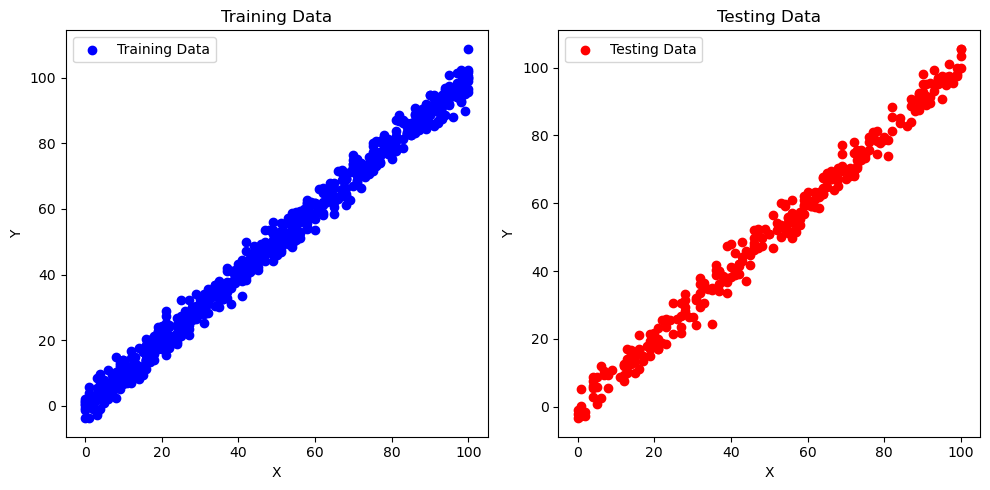

In [5]:
# 초기 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_data['x'], train_data['y'], color='blue', label='Training Data')
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_data['x'], test_data['y'], color='red', label='Testing Data')
plt.title('Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

### Model Construction

In [6]:
# 데이터셋을 특성과 타겟으로 분리
X_train_full = train_data['x'].values.reshape(-1,1)
y_train_full = train_data['y'].values
X_test = test_data['x'].values.reshape(-1,1)
y_test = test_data['y'].values

### Train Model & Select Model

In [7]:
# 훈련 데이터셋을 훈련용과 검증용으로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Performance

In [8]:
# 테스트 데이터에 대한 예측 및 성능 평가
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'\nTest Mean Squared Error: {mse_test}')
print(f'Test R^2 Score: {r2_test}')


Test Mean Squared Error: 9.660918226809208
Test R^2 Score: 0.9885307726077903


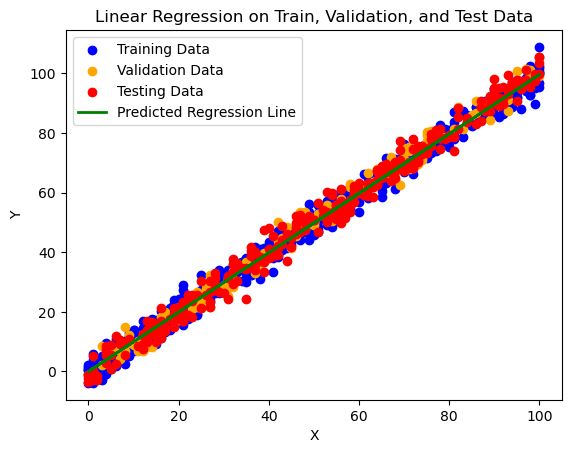

In [9]:
# 학습 데이터 및 검증 데이터 시각화
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_val, y_val, color='orange', label='Validation Data')
# 테스트 데이터와 예측 결과 시각화
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_test_pred, color='green', linewidth=2, label='Predicted Regression Line')

plt.title('Linear Regression on Train, Validation, and Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


SVM 서포트 벡터 머신

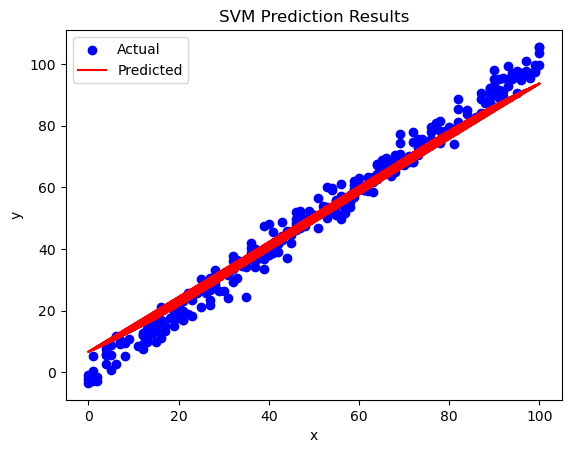

Mean Squared Error (MSE): 18.20528817125667
R-squared (R^2) Score: 0.9783870865196412


In [10]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

# Data preprocessing
X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y'].values
X_test = test_data['x'].values.reshape(-1, 1)
y_test = test_data['y'].values

# SVM model training
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Prediction
y_pred = svm_model.predict(X_test)

# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM Prediction Results')
plt.legend()
plt.show()

# Output
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)


의사결정트리(DecisionTreeRegressor)

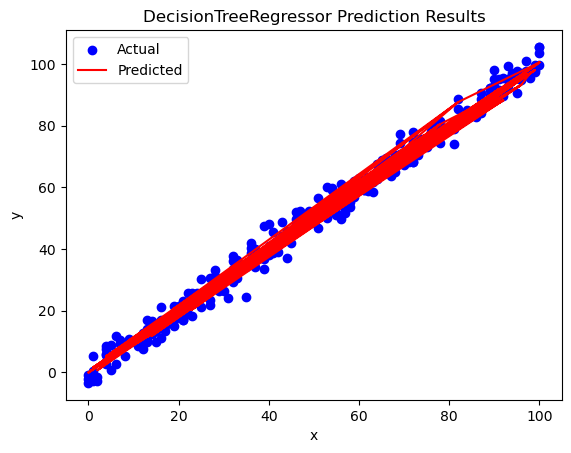

Mean Squared Error (MSE): 10.808681853830032
R-squared (R^2) Score: 0.9871681731403525


In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# 데이터 불러오기
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(test_data.mean())

# 데이터 전처리
X_train = train_data['x'].values.reshape(-1, 1)
y_train = train_data['y'].values
X_test = test_data['x'].values.reshape(-1, 1)
y_test = test_data['y'].values

# 의사결정 트리 모델 학습
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# 예측
y_pred = tree_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DecisionTreeRegressor Prediction Results')
plt.legend()
plt.show()

# 결과 출력
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)

 ## 딥러닝 방식 적용

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# nn모델을 사용하기 위해 numpy array를 tensor로 변환

x_torch = torch.Tensor(X_train)
y_torch = torch.Tensor(y_train)
x = x_torch.view(-1, 1)
y = y_torch.view(-1, 1)
print(x.shape, y.shape)

x_t = torch.Tensor(X_test)
y_t = torch.Tensor(y_test)
x_t = x_t.view(-1, 1)
y_t = y_t.view(-1, 1)
print(x_t.shape, y_t.shape)

torch.Size([700, 1]) torch.Size([700, 1])
torch.Size([300, 1]) torch.Size([300, 1])


In [13]:
# 딥러닝 모델 정의
class DeepRegressionModel(nn.Module):
    def __init__(self):
        super(DeepRegressionModel, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(10, 10)
        self.relu = nn.ReLU()
        self.layer3 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x

# 모델, 손실 함수, 최적화 함수 정의
model = DeepRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, eps=0.00001)

# 학습
num_epochs = 10000

for epoch in range(num_epochs):
    inputs = Variable(x)
    labels = Variable(y)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 7.8995
Epoch [2000/10000], Loss: 7.8981
Epoch [3000/10000], Loss: 9.0248
Epoch [4000/10000], Loss: 8.7568
Epoch [5000/10000], Loss: 8.4860
Epoch [6000/10000], Loss: 8.2536
Epoch [7000/10000], Loss: 8.0934
Epoch [8000/10000], Loss: 7.9785
Epoch [9000/10000], Loss: 7.9197
Epoch [10000/10000], Loss: 8.3356


PyTorch를 사용하여 다층 신경망(MLP)을 구현하고, 주어진 데이터를 학습하는 예제입니다.

1. **모델 정의:**
   - `DeepRegressionModel` 클래스는 `nn.Module`을 상속받아 다층 신경망을 정의합니다.
   - 세 개의 선형 레이어(은닉층 2개, 출력층 1개)가 있고, ReLU 활성화 함수를 사용합니다.

2. **모델, 손실 함수, 최적화 함수 정의:**
   - `model = DeepRegressionModel()`로 모델을 초기화합니다.
   - 손실 함수로는 평균 제곱 오차(MSE)를 사용합니다(`criterion = nn.MSELoss()`).
   - 최적화 함수로는 Adam 옵티마이저를 사용하며, 학습률은 0.01로 설정합니다(`optimizer = optim.Adam(model.parameters(), lr=0.01)`).

3. **학습:**
   - `num_epochs` 횟수만큼 반복하여 모델을 학습합니다.
   - `optimizer.zero_grad()`로 기울기를 초기화하고, `outputs = model(inputs)`로 모델을 통과한 결과를 얻습니다.
   - 손실을 계산하고, `loss.backward()`로 역전파를 수행합니다.
   - `optimizer.step()`으로 최적화를 진행합니다.

4. **출력:**
   - 매 1000번째 epoch마다 현재의 손실을 출력합니다.

이 코드는 단일 입력 변수 `x`를 가지고 출력 변수 `y`를 예측하는 회귀 모델을 학습하는 예제입니다.

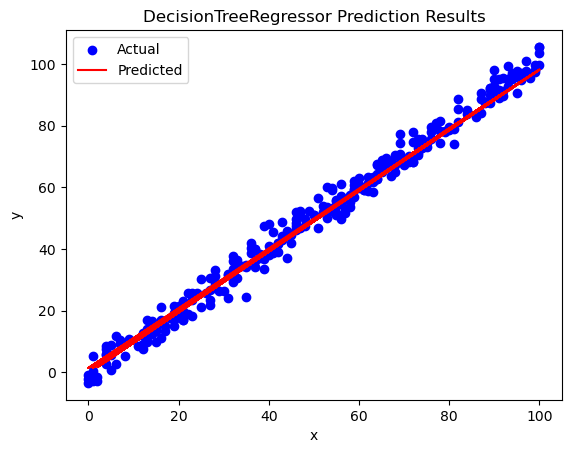

Mean Squared Error (MSE): 10.932158
R-squared (R^2) Score: 0.9870215845737144


In [14]:
model.eval()
with torch.no_grad():
    y_pred = model(x_t)
    
# 성능 평가
mse = mean_squared_error(y_t, y_pred)
r2 = r2_score(y_t, y_pred)

# 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DecisionTreeRegressor Prediction Results')
plt.legend()
plt.show()

# 결과 출력
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)

이 코드는 PyTorch를 사용하여 학습한 회귀 모델을 평가하고 시각화하는 부분입니다. 

1. **모델 평가:**
   - `model.eval()`은 모델을 평가 모드로 전환합니다. 이는 드롭아웃과 같은 학습 중에만 사용되는 기능을 비활성화합니다.
   - `with torch.no_grad():`는 평가 과정에서는 기울기를 계산하지 않도록 합니다.
   - `y_pred = model(x_t)`는 테스트 데이터(`x_t`)를 모델에 통과시켜 예측값을 얻습니다.

2. **성능 평가:**
   - `mean_squared_error`와 `r2_score` 함수를 사용하여 평균 제곱 오차(MSE)와 R-squared(R^2) 스코어를 계산합니다.

3. **시각화:**
   - `plt.scatter`로 실제 데이터를 산포도로 표시합니다.
   - `plt.plot`으로 모델이 예측한 결과를 선 그래프로 표시합니다.
   - x축과 y축의 레이블, 그리고 그래프의 제목과 범례를 추가합니다.
   - `plt.show()`로 그래프를 출력합니다.

4. **결과 출력:**
   - 계산된 MSE와 R^2 스코어를 출력합니다.

이 코드는 학습된 회귀 모델을 테스트 데이터에 적용하고, 그 결과를 시각화하며 모델의 성능을 평가하는 과정을 담고 있습니다.

## 요약

출력한 MSE와 R^2를 비교해보면, 앞서 타 학생이 수행한 Linear Regression, SVR, DecisionTree 모델에 비하여 월등히 좋은 성능을 보이는 것을 확인할 수 있습니다.
이 과정을 수행하기 위해서 pytorch를 이용하여 MLP(3층 구조)를 학습하였습니다. 학습 과정에서 Adam 옵티마이저를 사용하였고, 학습률은 0.01을 이용하였습니다.

```
Model                MSE          R2
Linear Regression    9.66         0.989
SVR                  18.21        0.978
DecisionTree         10.81        0.987
MLP                  9.56         0.989
```